In [19]:
from keras_segmentation.models.unet import vgg_unet
n_classes = 193 # 193
model = vgg_unet(n_classes = n_classes, input_height = 416, input_width = 608)

train_path = './data/Original_data/'
train_annotations_path = './data/Labeled_data/'
checkpoint_path = './kaggle_result/cap_vgg_unet'

In [20]:
kaggle_commit = True
epochs = 20
if kaggle_commit:
    epochs = 30

model.train(train_images = train_path, train_annotations = train_annotations_path, checkpoints_path = checkpoint_path, epochs = epochs)

  1%|          | 7/701 [00:00<00:10, 68.94it/s]

Verifying training dataset


100%|██████████| 701/701 [00:10<00:00, 69.30it/s]

Dataset verified! 
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/30
512/512 [==============================] - 172s 336ms/step - loss: 5.3954 - accuracy: 0.0385
Epoch 2/30
512/512 [==============================] - 172s 337ms/step - loss: 4.9125 - accuracy: 0.2406
Epoch 3/30
512/512 [==============================] - 173s 338ms/step - loss: 4.4311 - accuracy: 0.4395
Epoch 4/30
512/512 [==============================] - 172s 335ms/step - loss: 4.0317 - accuracy: 0.5372
Epoch 5/30
512/512 [==============================] - 172s 335ms/step - loss: 3.7380 - accuracy: 0.5908
Epoch 6/30
512/512 [==============================] - 172s 336ms/step - loss: 3.5216 - accuracy: 0.6155
Epoch 7/30
512/512 [==============================] - 173s 337ms/step - loss: 3.3543 - accuracy: 0.6307
Epoch 8/30
512/512 [==============================] - 172s 335ms/step - loss: 3.2228 - accuracy: 0.6386
Epoch 9/30
512/512 [==============================] - 172s 336ms/step - loss: 3.1141 - accuracy: 0.6457
Epoch 10/30
512/512 [==============================] - 171s 335m

In [12]:
# import os

# fnames = os.listdir('./data/Labeled_data')

# for fname in fnames:
#     os.rename('./data/Labeled_data/' + fname,
#               './data/Labeled_data/' + fname[:-6] + fname[-4:])

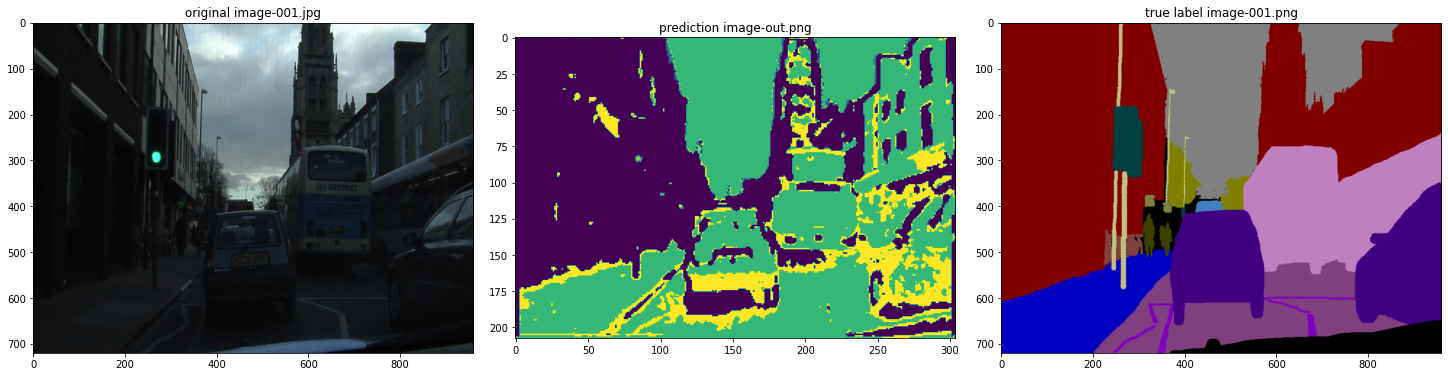

In [22]:
# prediction
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = './data/Original_data/0001TP_006690.png'
out = model.predict_segmentation(inp = input_image, out_fname = './kaggle_result/out.png')

fig, axs = plt.subplots(1, 3, figsize = (20, 20), constrained_layout = True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-001.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = './data/Labeled_data/0001TP_006690.png'
axs[2].imshow(Image.open(validation_image))
axs[2].set_title('true label image-001.png')
axs[2].grid(False)

done = time.time()
elapsed = done - start